In [1]:
import requests
import json
from bs4 import BeautifulSoup as bs
import pandas as pd
import ast
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch

In [2]:
url_input = input('Enter URL match')
url_input

'https://www.fotmob.com/es/matches/sevilla-vs-real-valladolid/2ut5xe#4506810'

In [3]:
url_input

'https://www.fotmob.com/es/matches/sevilla-vs-real-valladolid/2ut5xe#4506810'

In [3]:
# FotMob
url = url_input

r = requests.get(url)

soup = bs(r.content)

soup.find('script', attrs={'id': '__NEXT_DATA__'})

soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents

soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0]

json.loads(soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0])

json_fotmob = json.loads(soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0])

df_shots = pd.DataFrame(json_fotmob['props']['pageProps']['content']['shotmap']['shots'])
df_shots.head()

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,...,situation,period,isOwnGoal,onGoalShot,isSavedOffLine,isFromInsideBox,firstName,lastName,fullName,teamColor
0,2725424201,Miss,10281,821271,Marcos de Sousa,96.701754,37.660000,4,NaN,False,...,SetPiece,FirstHalf,False,"{'x': 0, 'y': 0.4606685745851531, 'zoomRatio':...",False,True,Marcos,de Sousa,Marcos de Sousa,#63257E
1,2725424681,AttemptSaved,8302,688876,Dodi Lukebakio,95.640351,17.132994,6,NaN,True,...,SetPiece,FirstHalf,False,"{'x': 0.6974206349206338, 'y': 0.3227513211640...",False,True,Dodi,Lukebakio,Dodi Lukebakio,#C90F20
2,2725425835,AttemptSaved,8302,1132607,Gerard Fernandez,89.800000,35.220000,9,NaN,True,...,FastBreak,FirstHalf,False,"{'x': 0.9596560846560838, 'y': 0.3227513211640...",False,True,Gerard,Fernandez,Gerard Fernandez,#C90F20
3,2725425857,Miss,8302,309334,Saul Niguez,80.795631,41.425625,9,NaN,False,...,FastBreak,FirstHalf,False,"{'x': 0.6594694291949043, 'y': 0.6772486772486...",False,False,Saul,Niguez,Saul Niguez,#C90F20
4,2725428889,AttemptSaved,8302,643709,Kelechi Iheanacho,95.929825,38.620476,20,NaN,True,...,RegularPlay,FirstHalf,False,"{'x': 1.0806878306878307, 'y': 0.3227513211640...",False,True,Kelechi,Iheanacho,Kelechi Iheanacho,#C90F20


In [24]:
# has_nan = df_shots['expectedGoals'].isna().any()
# print(has_nan)  # Returns True if there are NaN values, False otherwise

# nan_count = df_shots['expectedGoals'].isna().sum()
# print(nan_count)  # Returns the number of NaN values in the column

# no_nan = df_shots['expectedGoals'].notna().all()
# print(no_nan)  # Returns True if no NaN values are present

df_shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     31 non-null     int64  
 1   eventType              31 non-null     object 
 2   teamId                 31 non-null     int64  
 3   playerId               31 non-null     int64  
 4   playerName             31 non-null     object 
 5   x                      31 non-null     float64
 6   y                      31 non-null     float64
 7   min                    31 non-null     int64  
 8   minAdded               7 non-null      float64
 9   isBlocked              31 non-null     bool   
 10  isOnTarget             31 non-null     bool   
 11  blockedX               20 non-null     float64
 12  blockedY               20 non-null     float64
 13  goalCrossedY           31 non-null     float64
 14  goalCrossedZ           31 non-null     float64
 15  expected

In [4]:
z = df_shots[['eventType', 'expectedGoals', 'isOwnGoal']]
z

,eventType,expectedGoals,isOwnGoal
0,Miss,0.060964,False
1,AttemptSaved,0.038132,False
2,AttemptSaved,0.188316,False
3,Miss,0.045372,False
4,AttemptSaved,0.082220,False
5,AttemptSaved,0.051800,False
6,AttemptSaved,0.077326,False
7,AttemptSaved,0.030939,False
8,Miss,0.119139,False
9,AttemptSaved,0.177150,False


In [7]:
# If you want to convert it to a LIST add .tolist()

# xG = df_shots['expectedGoals']
# xG_list = xG.tolist()
# xG_list

# xG=df_shots.expectedGoals
# xG

# xG_loc = df_shots.loc[:, 'expectedGoals']
# xG_loc

# xG_get = df_shots.get('expectedGoals')
# xG_get

# Using .iloc[]: If you know the position of the name column (e.g., if it's the first column):
# column_position = df_shots.columns.get_loc('expectedGoals')
# column_position
xG_iloc = df_shots.iloc[:, 15]
xG_iloc

0     0.060964
1     0.038132
2     0.188316
3     0.045372
4     0.082220
5     0.051800
6     0.077326
7     0.030939
8     0.119139
9     0.177150
10    0.102630
11    0.217000
12    0.090052
13    0.051714
14    0.036053
15    0.019672
16    0.267403
17    0.038540
18    0.005395
19    0.015462
20    0.023859
21    0.051628
22    0.047317
23    0.026234
24    0.029480
25    0.015354
26    0.669369
27    0.138598
28    0.013065
29    0.147700
30    0.110531
Name: expectedGoals, dtype: float64

In [5]:
# Replace NaN with 0
# df_shots['expectedGoals'].fillna(0, inplace=True)

# Replace with the mean of the column:
# df_shots['expectedGoals'].fillna(df_shots['expectedGoals'].mean(), inplace=True)

# Replace with the median of the column:
df_shots['expectedGoals'].fillna(df_shots['expectedGoals'].median(), inplace=True)


/tmp/ipykernel_39951/3470650161.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_shots['expectedGoals'].fillna(df_shots['expectedGoals'].median(), inplace=True)


In [6]:
local_team_id = json_fotmob['props']['pageProps']['general']['homeTeam']['id']
local_team_id

8302

In [9]:
json_fotmob['props']['pageProps']['general']

{'matchId': '4506810',
 'matchName': 'Sevilla-vs-Real Valladolid_Tue, Sep 24, 2024, 17:00 UTC',
 'matchRound': '7',
 'teamColors': {'darkMode': {'home': '#FFFFFF', 'away': '#6f3c9c'},
  'lightMode': {'home': '#C90F20', 'away': '#63257E'},
  'fontDarkMode': {'home': 'rgba(29, 29, 29, 1.0)',
   'away': 'rgba(255, 255, 255, 1.0)'},
  'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
   'away': 'rgba(255, 255, 255, 1.0)'}},
 'leagueId': 87,
 'leagueName': 'LaLiga',
 'leagueRoundName': 'Round 7',
 'parentLeagueId': 87,
 'countryCode': 'ESP',
 'parentLeagueName': 'LaLiga',
 'parentLeagueSeason': '2024/2025',
 'parentLeagueTopScorerLink': 'https://data.fotmob.com/stats/87/season/23686/goals.json',
 'homeTeam': {'name': 'Sevilla', 'id': 8302},
 'awayTeam': {'name': 'Real Valladolid', 'id': 10281},
 'coverageLevel': 'xG',
 'matchTimeUTC': 'Tue, Sep 24, 2024, 17:00 UTC',
 'matchTimeUTCDate': '2024-09-24T17:00:00.000Z',
 'started': True,
 'finished': True}

In [7]:
leagueName = json_fotmob['props']['pageProps']['general']['leagueName']
print(leagueName)
leagueRound = json_fotmob['props']['pageProps']['general']['leagueRoundName']
print(leagueRound)

LaLiga
Round 7


In [8]:
league_title = leagueName + ' | ' + leagueRound
league_title

'LaLiga | Round 7'

In [9]:
json_fotmob['props']['pageProps']['header']['teams']

[{'name': 'Sevilla',
  'id': 8302,
  'score': 2,
  'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/8302_small.png',
  'pageUrl': '/teams/8302/overview/sevilla',
  'fifaRank': None},
 {'name': 'Real Valladolid',
  'id': 10281,
  'score': 1,
  'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/10281_small.png',
  'pageUrl': '/teams/10281/overview/real-valladolid',
  'fifaRank': None}]

In [9]:
# Get ID and team names
local_team_name = json_fotmob['props']['pageProps']['header']['teams'][0]['name']
print(local_team_name)
away_team_name = json_fotmob['props']['pageProps']['header']['teams'][1]['name']
print(away_team_name)

Sevilla
Real Valladolid


In [10]:
local_team_score = json_fotmob['props']['pageProps']['header']['teams'][0]['score']
print(local_team_score)
away_team_score = json_fotmob['props']['pageProps']['header']['teams'][1]['score']
print(away_team_score)

2
1


In [11]:
plot_title = local_team_name + ' ' + str(local_team_score) + '-' + str(away_team_score) + ' ' + away_team_name
plot_title

'Sevilla 2-1 Real Valladolid'

In [15]:
# Get color teams
json_fotmob['props']['pageProps']['general']['teamColors']

{'darkMode': {'home': '#FFFFFF', 'away': '#6f3c9c'},
 'lightMode': {'home': '#C90F20', 'away': '#63257E'},
 'fontDarkMode': {'home': 'rgba(29, 29, 29, 1.0)',
  'away': 'rgba(255, 255, 255, 1.0)'},
 'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
  'away': 'rgba(255, 255, 255, 1.0)'}}

In [12]:
shots_local_name = local_team_name + ' ' + 'shots'
shots_local_name = shots_local_name.upper()
print(shots_local_name)

shots_away_name = away_team_name + ' ' + 'shots'
shots_away_name = shots_away_name.upper()
print(shots_away_name)

SEVILLA SHOTS
REAL VALLADOLID SHOTS


In [14]:
type('isOwnGoal')

str

In [86]:
df_shots.columns

Index(['id', 'eventType', 'teamId', 'playerId', 'playerName', 'x', 'y', 'min',
       'minAdded', 'isBlocked', 'isOnTarget', 'blockedX', 'blockedY',
       'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'shotType', 'situation', 'period', 'isOwnGoal',
       'onGoalShot', 'isSavedOffLine', 'isFromInsideBox', 'firstName',
       'lastName', 'fullName', 'teamColor'],
      dtype='object')

In [41]:
type('isOwnGoal')

str

In [16]:
# 8302
df_shots[['eventType', 'isOwnGoal', 'teamId']]

,eventType,isOwnGoal,teamId
0,Miss,False,10281
1,AttemptSaved,False,8302
2,AttemptSaved,False,8302
3,Miss,False,8302
4,AttemptSaved,False,8302
5,AttemptSaved,False,8302
6,AttemptSaved,False,8302
7,AttemptSaved,False,8302
8,Miss,False,8302
9,AttemptSaved,False,8302


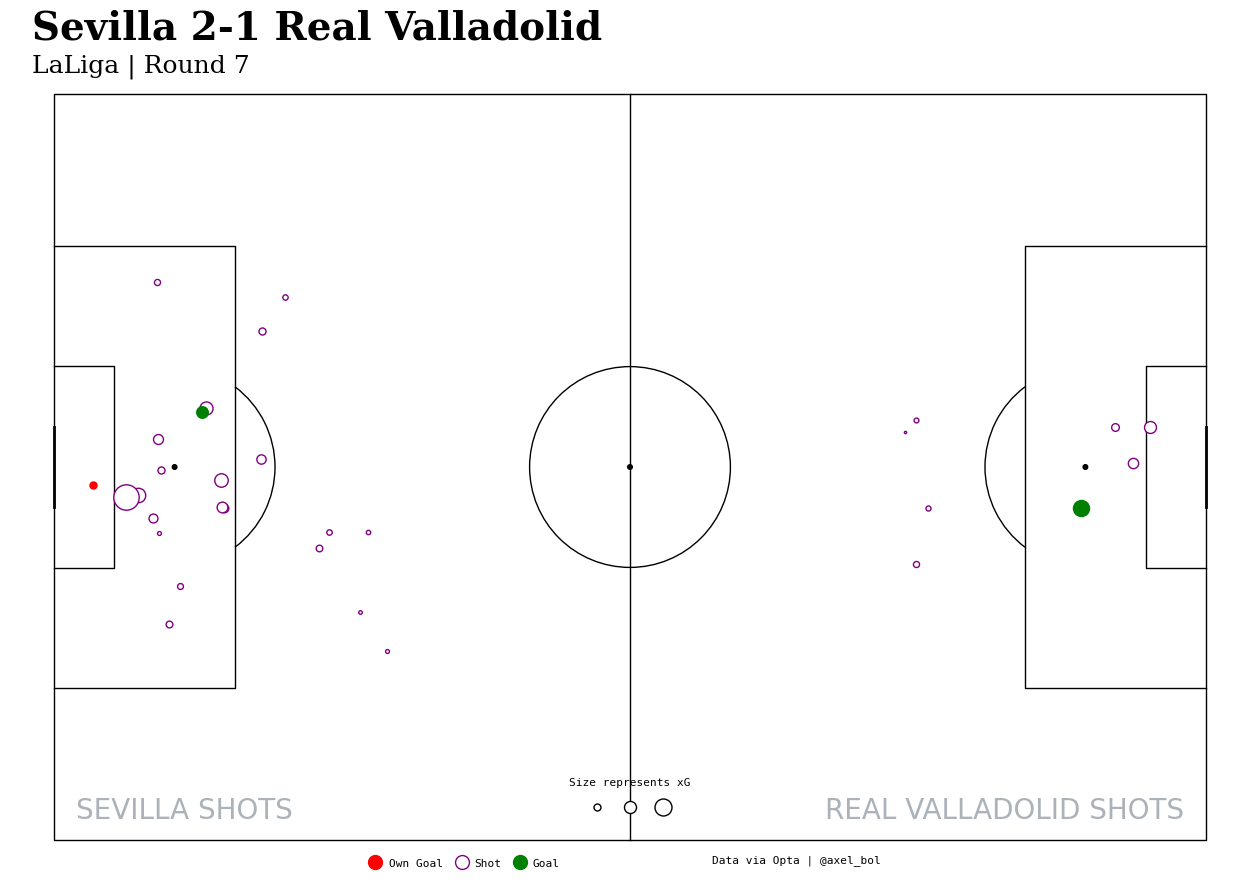

In [14]:
# add facecolor='red' if you want the color red around the pitch
fig, ax = plt.subplots(figsize=(16, 12))
pitch = Pitch(pitch_type='custom', pitch_length=105, pitch_width=68, line_color='black', linewidth=1, pitch_color='white', label=False)
pitch.draw(ax=ax)

# plot the shots
# We want the size of the shot to be 500 * the expected goals value
# We also want to leave the marker empty if the shot was missed and fill it if it was a goal
for x in df_shots.to_dict(orient='records'):
    if x['teamId'] == local_team_id:
        # We want to plot the local team on right side of the pitch
        # So we need to mirror both the x and y coordinates
        c_color = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'white'
        ),
        ec_edge_colors = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'purple'
        )
        pitch.scatter(
            x=105-x['x'],
            y=68-x['y'],
            ax=ax,
            s=500*x['expectedGoals'],
            ec=ec_edge_colors,
            c=c_color,
            # alpha=1 if x['eventType'] == 'Goal' else 0.5,
            zorder=2 if x['eventType'] == 'Goal' else 1
        )
    # left side
    else:
        c_color = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'white'
        ),
        ec_edge_colors = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'purple'
        )
        pitch.scatter(
            x=x['x'],
            y=x['y'],
            ax=ax,
            s=500*x['expectedGoals'],
            ec=ec_edge_colors,
            c=c_color,
            # alpha=1 if x['eventType'] == 'Goal' else .5,
            zorder=2 if x['eventType'] == 'Goal' else 1
        )

# fig.suptitle('The Strongest - Bolivar',  fontsize=15, fontweight=600)
# plt.title('Title', x=0.1, y=1)
# ax.set_title('División Profesional', x=0.1, y=0.95, fontsize=10, fontweight=600, color='black', loc='left')

# We can also add a title directly above the text we added
ax.text(-2, 73, plot_title, ha='left', fontsize=28, fontfamily='serif', fontweight=600, color='black')
ax.text(-2, 70, league_title, ha='left', fontsize=18, fontfamily='serif', fontweight=100)

# We can add a title above the different halves of the pitch
ax.text(2, 2, shots_local_name, ha='left', fontsize=20, fontweight=500, color='#abb2b9')
ax.text(103, 2, shots_away_name, ha='right', fontsize=20, fontweight=500, color='#abb2b9')

# Lets also add a legend for the size of the shots in the bottom middle of the pitch
pitch.scatter(49.5, 3, s=500*.05, ec='black', c='white', ax=ax)
pitch.scatter(52.5, 3, s=500*.15, ec='black', c='white', ax=ax)
pitch.scatter(55.5, 3, s=500*.3, ec='black', c='white', ax=ax)
# We can add a label for the legend
ax.text(52.5, 5, 'Size represents xG', ha='center', fontsize=8, fontfamily='monospace')
# Legend
pitch.scatter(29.3, -2, s=500*.2, ec='red', c='red', ax=ax)
ax.text(33, -2.4, 'Own Goal', ha='center', fontsize=8, fontfamily='monospace')
pitch.scatter(37.2, -2, s=500*.2, ec='purple', c='white', ax=ax)
ax.text(39.5, -2.4, 'Shot', ha='center', fontsize=8, fontfamily='monospace')
pitch.scatter(42.5, -2, s=500*.2, ec='green', c='green', ax=ax)
ax.text(44.8, -2.4, 'Goal', ha='center', fontsize=8, fontfamily='monospace')
# info
ax.text(60, -2, 'Data via Opta | @axel_bol', ha='left', fontsize=8, fontfamily='monospace')
# plt.savefig('/home/axel/Code/images/imagemedian.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)

plt.show()